In [1]:

"""
idp_rl Analysis Example
=============================
View the notebook in Google Colab: https://drive.google.com/drive/folders/1WAnTv4SGwEQHHqyMcbrExzUob_mOfTcM?usp=sharing

This notebook gives examples of how the analysis functions in idp_rl can be used.
The example data (example_data1.pickle, example_data2.pickle and example_data3.pickle) were all
data taken from different evaluation episodes of an actual run.

The full API reference for the analysis module can be found at: 
"""
import sys
sys.path.append("..")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
from idp_rl import analysis

/home/yppatel/anaconda3/envs/idp/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
"""
Loading the data
----------------

We load the data by specifying the filenames of the .pickle files to load. Note that we can
load multiple sets of data. In this example, each data corresponds to a different evaluation episode
taken at different points in the training of an agent. By loading all three datasets we can compare the
performance of the agent across all three episodes.

We can also specify labels for the data (which will appear in the Seaborn plots).
"""
# Specify data files to load
files = [
    # 'chignolin_1.pickle',
    # 'chignolin_2.pickle',
    # 'chignolin_3.pickle',
    'chignolin_4.pickle',
]

# Specify labels for each data set
labels = [
    # 'chignolin_1',
    # 'chignolin_2',
    # 'chignolin_3',
    'chignolin_4',
]

data = analysis.load_data_from_pickle(files, labels)

(array([ 11.,  33.,  55., 118., 162., 180., 145.,  75.,  58.,  23.]),
 array([-25.05830422, -10.47630778,   4.10568866,  18.6876851 ,
         33.26968154,  47.85167798,  62.43367443,  77.01567087,
         91.59766731, 106.17966375, 120.76166019]),
 <BarContainer object of 10 artists>)

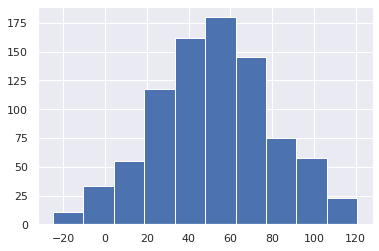

In [3]:
energies = sorted(data["energy"][0])[:-140]
plt.hist(energies)

(array([ 11.,  33.,  55., 118., 162., 180., 145.,  75.,  58.,  23.]),
 array([-25.05830422, -10.47630778,   4.10568866,  18.6876851 ,
         33.26968154,  47.85167798,  62.43367443,  77.01567087,
         91.59766731, 106.17966375, 120.76166019]),
 <BarContainer object of 10 artists>)

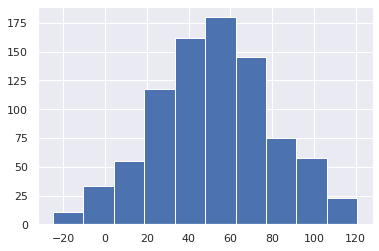

In [4]:
energies = sorted(data["energy"][0])[:-140]
plt.hist(energies)

In [22]:
rl_tfd = data['tfd_matrix']

(array([  2.,  11.,  40.,  93., 161., 187., 165., 119.,  51.,  31.]),
 array([-32.56663057, -17.53110307,  -2.49557557,  12.53995193,
         27.57547943,  42.61100693,  57.64653443,  72.68206193,
         87.71758943, 102.75311692, 117.78864442]),
 <BarContainer object of 10 artists>)

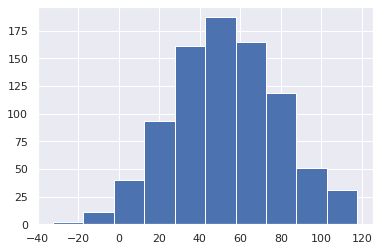

In [ ]:
energies = sorted(data["energy"][0])[:-140]
plt.hist(energies)

<AxesSubplot:xlabel='run', ylabel='total_rewards'>

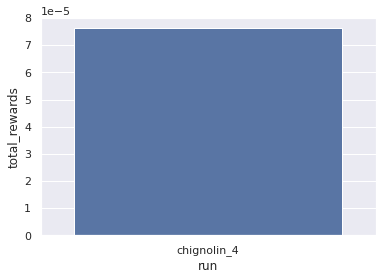

In [ ]:
"""
bar_plot_episodic is used to compare any single scaler value across all sets of data.
In this example we visualize the total reward (sum of all rewards in the episode) across all three episodes.
"""
analysis.bar_plot_episodic("total_rewards", data)

<AxesSubplot:xlabel='run', ylabel='total_rewards'>

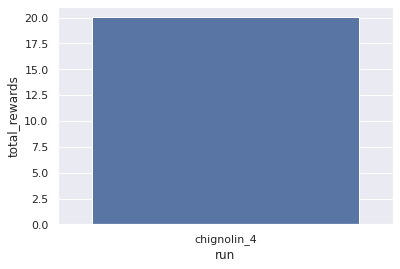

In [ ]:
"""
bar_plot_episodic is used to compare any single scaler value across all sets of data.
In this example we visualize the total reward (sum of all rewards in the episode) across all three episodes.
"""
analysis.bar_plot_episodic("total_rewards", data)

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:xlabel='chignolin_4'>)

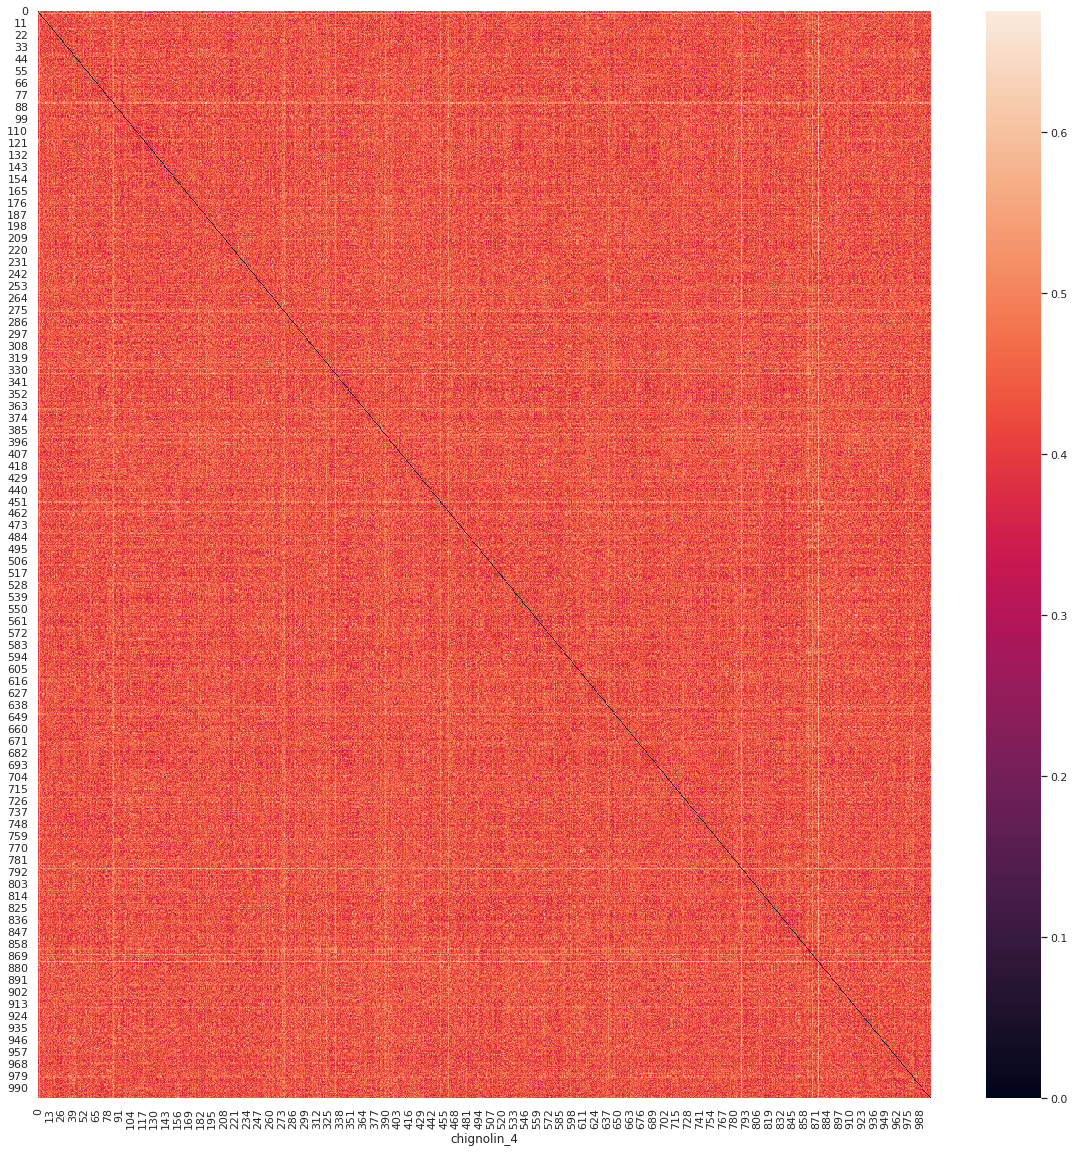

In [ ]:
"""
calculate_tfd() calculates the TFD (Torsional Fingerprint Deviation) matrix between all conformers for each dataset.
The TFD measures how similar the conformers are to each other and is helpful for determining the diversity of the conformers generated.
"""
rl_tfd = analysis.calculate_tfd(data)

"""
We can then visualize the TFD matrices generated for each dataset.

Notice that second and third datasets have a lot of conformer pairs with low TFD. This means
that the agent generated many duplicate conformers.
"""
analysis.heatmap_episodic('tfd_matrix', data, figsize=(20, 20))

<AxesSubplot:xlabel='run', ylabel='tfd_total'>

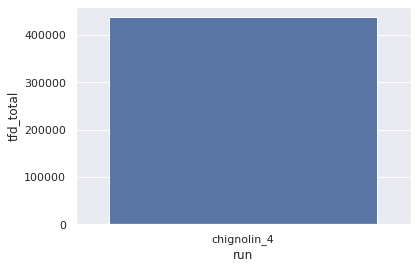

In [ ]:
"""
We can also visualize the sum of the TFD matrices as a measure of the
diversity of the generated conformers for each dataset.
"""
analysis.bar_plot_episodic('tfd_total', data)

In [ ]:
"""
We can visualize a single molecule from one of the datasets.
"""
analysis.drawConformer(data['mol'][0], confId=100, size=(500,300))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [7]:
"""
We can also visualize multiple generated conformers within a dataset.
"""
import py3Dmol

mol = data['mol'][0] 
size = (500,300)

confIds = [0, 10, 20]
view = py3Dmol.view(width=size[0], height=size[1])

for confId in confIds:
    block = Chem.MolToMolBlock(mol, confId=confId)
    view.addModel(block, 'mol')
    
view.setStyle({"stick" : {}})
view.zoomTo()
view.show()

NameError: name 'Chem' is not defined

In [30]:
import rdkit.Chem.AllChem as Chem

mol = data['mol'][0] 
Chem.MMFFSanitizeMolecule(mol)
mmff_props = Chem.MMFFGetMoleculeProperties(mol)
ff = Chem.MMFFGetMoleculeForceField(mol, mmff_props, confId=0)
energy = ff.CalcEnergy()

[16:07:25] Molecule does not have explicit Hs. Consider calling AddHs()


In [31]:
energies = []

for i in range(1000):
    ff = Chem.MMFFGetMoleculeForceField(mol, mmff_props, confId=i)
    energy = ff.CalcEnergy()
    energies.append(energy)

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
indices = np.argsort(energies)
# sorted_energies = sorted(energies)

In [12]:
plt.hist(sorted_energies[50:150])

NameError: name 'sorted_energies' is not defined

In [14]:
from rdkit.Chem import TorsionFingerprints
from rdkit.Chem import rdMolTransforms

nonring, _ = TorsionFingerprints.CalculateTorsionLists(mol)
full_dihedrals = []
for tmp_idx in range(1000):
    conf_id = int(indices[tmp_idx])
    conf = mol.GetConformer(conf_id)
    
    ff = Chem.MMFFGetMoleculeForceField(mol, mmff_props, confId=conf_id)
    energy = ff.CalcEnergy()

    dihedral_angles = []
    for torsion_tup in nonring:
        dihedral_angle = rdMolTransforms.GetDihedralDeg(conf, *torsion_tup[0][0])
        if dihedral_angle < 0:
            dihedral_angle += 360
        dihedral_angles.append(dihedral_angle)
    full_dihedrals.append(dihedral_angles)
full_dihedrals = np.array(full_dihedrals)

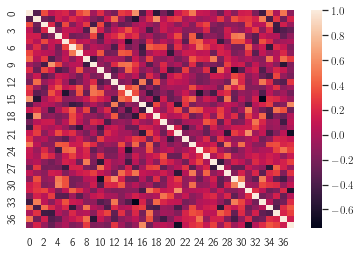

In [86]:
cov = np.corrcoef(full_dihedrals.T)

sns.set_style("whitegrid")
plt.rcParams['text.usetex'] = True
plt.rcParams["axes.grid"] = False
blue, = sns.color_palette("muted", 1)

ax = sns.heatmap(cov)
plt.show()

In [91]:
nonring, ring = TorsionFingerprints.CalculateTorsionLists(mol)
full_dihedrals = []
for tmp_idx in range(18):
    conf_id = int(indices[tmp_idx])
    dihedral_angles = []
    angles = TorsionFingerprints.CalculateTorsionAngles(mol, nonring, ring, confId=conf_id)
    for dihedral_angle in angles: # nonring:
        dihedral_angles.append(dihedral_angle[0][0])
    full_dihedrals.append(dihedral_angles)
full_dihedrals = np.array(full_dihedrals)

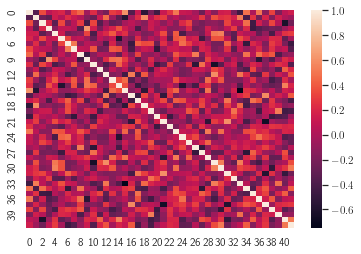

In [92]:
cov = np.corrcoef(full_dihedrals.T)

sns.set_style("whitegrid")
plt.rcParams['text.usetex'] = True
plt.rcParams["axes.grid"] = False
blue, = sns.color_palette("muted", 1)

ax = sns.heatmap(cov)
plt.show()

In [69]:
analysis.drawConformer(data['mol'][0], confId=int(indices[5]), size=(500,300))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [80]:
"""
We can also visualize multiple generated conformers within a dataset.
"""
import py3Dmol

mol = data['mol'][0] 
size = (500,300)

confIds = list(range(1,6))
view = py3Dmol.view(width=size[0], height=size[1])

for confId in confIds:
    block = Chem.MolToMolBlock(mol, confId=int(indices[confId]))
    view.addModel(block, 'mol')
    
view.setStyle({"stick" : {}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [79]:
import rdkit.Chem as Chem

temp_ids = list(range(1,6))
Chem.rdMolAlign.AlignMolConformers(mol, confIds=[int(indices[temp_id]) for temp_id in temp_ids])

In [90]:
Chem.rdmolfiles.MolToPDBFile(mol, "chig_test.pdb", confId=int(indices[5]))

In [15]:
full_dihedrals.shape

(1000, 38)

In [33]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, init='random').fit_transform(full_dihedrals)
X_embedded.shape

(1000, 2)

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 5)
label = kmeans.fit_predict(X_embedded)

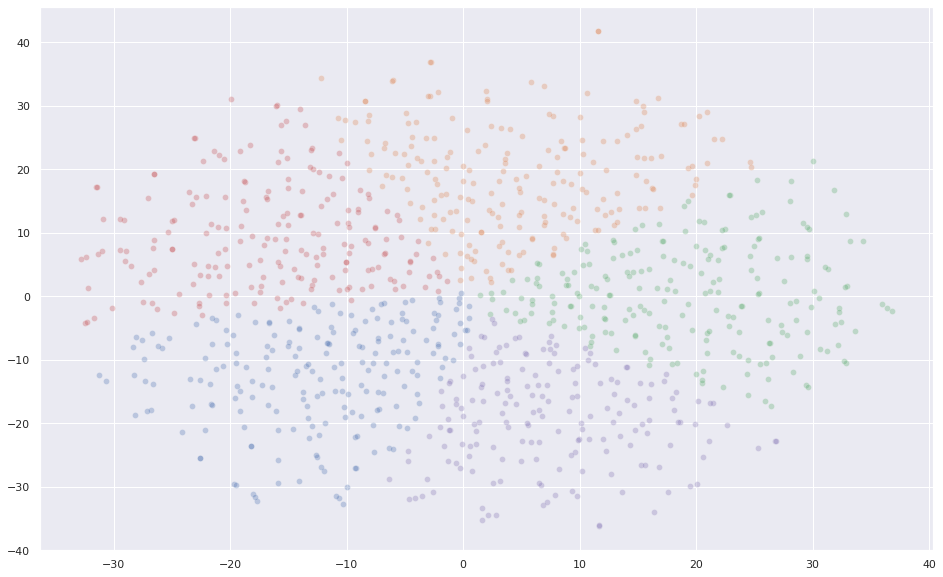

In [37]:
plt.figure(figsize=(16,10))

for label_idx in range(5):
    sns.scatterplot(
        x=X_embedded[label == label_idx,0], 
        y=X_embedded[label == label_idx,1],
        palette=sns.color_palette("hls", 10),
        legend="full",
        alpha=0.3
    )

In [6]:
samples = X_embedded[label == 0,:]

NameError: name 'X_embedded' is not defined

In [7]:
import os
os.environ["MP_RANK"] = "0"
os.getenv("MP_RANK")

'0'

In [52]:
from idp_rl.environments.environment_components.forcefield_mixins import CharMMMixin, MMFFMixin
from idp_rl.molecule_generation.generate_chignolin import generate_chignolin

import copy
import numpy as np
import openmm
import rdkit.Chem.AllChem as Chem

charmm_sim = CharMMMixin()
charmm_sim._seed("GYDPETGTWG")

chignolin = generate_chignolin("GYDPETGTWG")

/home/yppatel/idp_rl/idp_rl/molecule_generation/chignolin/GYDPETGTWG.psf


In [77]:
num_confs = 200

chignolin.RemoveAllConformers()
Chem.EmbedMultipleConfs(chignolin, numConfs=num_confs)
Chem.MMFFSanitizeMolecule(chignolin)

opt_chignolin = copy.deepcopy(chignolin)

mmff_props = Chem.MMFFGetMoleculeProperties(chignolin)

non_opt_energies = []
opt_energies = []
for i in range(num_confs):
    ff = Chem.MMFFGetMoleculeForceField(opt_chignolin, mmff_props, confId=i)
    energy = ff.CalcEnergy()
    non_opt_energies.append(energy)

    charmm_sim._optimize_conf(opt_chignolin, i)

    ff = Chem.MMFFGetMoleculeForceField(opt_chignolin, mmff_props, confId=i)
    energy = ff.CalcEnergy()
    opt_energies.append(energy)

[16:39:12] Molecule does not have explicit Hs. Consider calling AddHs()
[16:42:37] Molecule does not have explicit Hs. Consider calling AddHs()


In [78]:
import copy
rl_mol = copy.deepcopy(data['mol'][0])
rl_mol.RemoveAllConformers()

rl_energies = []
for i in range(num_confs):
    mmff_props = Chem.MMFFGetMoleculeProperties(data['mol'][0])
    ff = Chem.MMFFGetMoleculeForceField(data['mol'][0], mmff_props, confId=int(indices[i]))
    energy = ff.CalcEnergy()
    rl_energies.append(energy)

    rl_mol.AddConformer(data['mol'][0].GetConformer(int(indices[i])))

[16:42:53] Molecule does not have explicit Hs. Consider calling AddHs()
[16:42:53] Molecule does not have explicit Hs. Consider calling AddHs()
[16:42:53] Molecule does not have explicit Hs. Consider calling AddHs()
[16:42:53] Molecule does not have explicit Hs. Consider calling AddHs()
[16:42:53] Molecule does not have explicit Hs. Consider calling AddHs()
[16:42:53] Molecule does not have explicit Hs. Consider calling AddHs()
[16:42:53] Molecule does not have explicit Hs. Consider calling AddHs()
[16:42:53] Molecule does not have explicit Hs. Consider calling AddHs()
[16:42:53] Molecule does not have explicit Hs. Consider calling AddHs()
[16:42:53] Molecule does not have explicit Hs. Consider calling AddHs()
[16:42:53] Molecule does not have explicit Hs. Consider calling AddHs()
[16:42:53] Molecule does not have explicit Hs. Consider calling AddHs()
[16:42:53] Molecule does not have explicit Hs. Consider calling AddHs()
[16:42:54] Molecule does not have explicit Hs. Consider calling 

Text(0.5, 0, '$\\mathcal{E}_{MMFF}$')

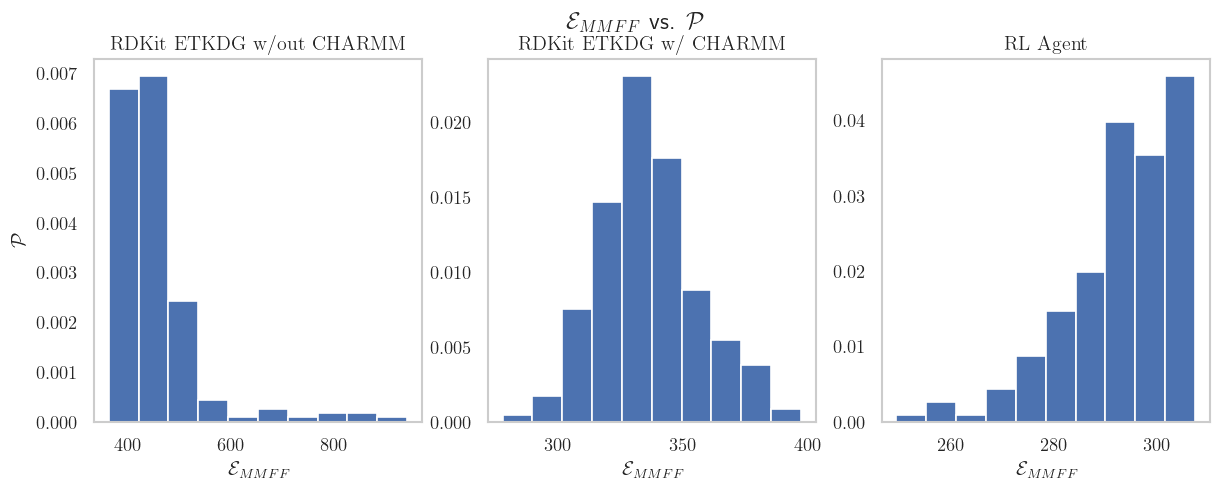

In [99]:
plt.rcParams["axes.grid"] = False
sns.set_style("whitegrid")
plt.rcParams['text.usetex'] = True
plt.rcParams["axes.grid"] = False
blue, = sns.color_palette("muted", 1)

fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=120)
axs[0].hist(non_opt_energies, density=True)
axs[1].hist(opt_energies, density=True)
axs[2].hist(rl_energies, density=True)

fig.suptitle('$\mathcal{E}_{MMFF}$ vs. $\mathcal{P}$')
axs[0].set_title('$\mathrm{RDKit \\ ETKDG \\ w/out \\ CHARMM}$')
axs[1].set_title('$\mathrm{RDKit \\ ETKDG \\ w/ \\ CHARMM}$')
axs[2].set_title('$\mathrm{RL \\ Agent}$')

axs[0].set_xlabel('$\mathcal{E}_{MMFF}$')
axs[0].set_ylabel('$\mathcal{P}$')
axs[1].set_xlabel('$\mathcal{E}_{MMFF}$')
axs[2].set_xlabel('$\mathcal{E}_{MMFF}$')

In [80]:
from idp_rl.utils import tfd_matrix

tfd_vanilla_nonopt = tfd_matrix(chignolin)
tfd_vanilla_opt = tfd_matrix(opt_chignolin)
tfd_rl = tfd_matrix(rl_mol)

Text(0.5, 1.0, '$\\mathrm{RL \\ Agent}$')

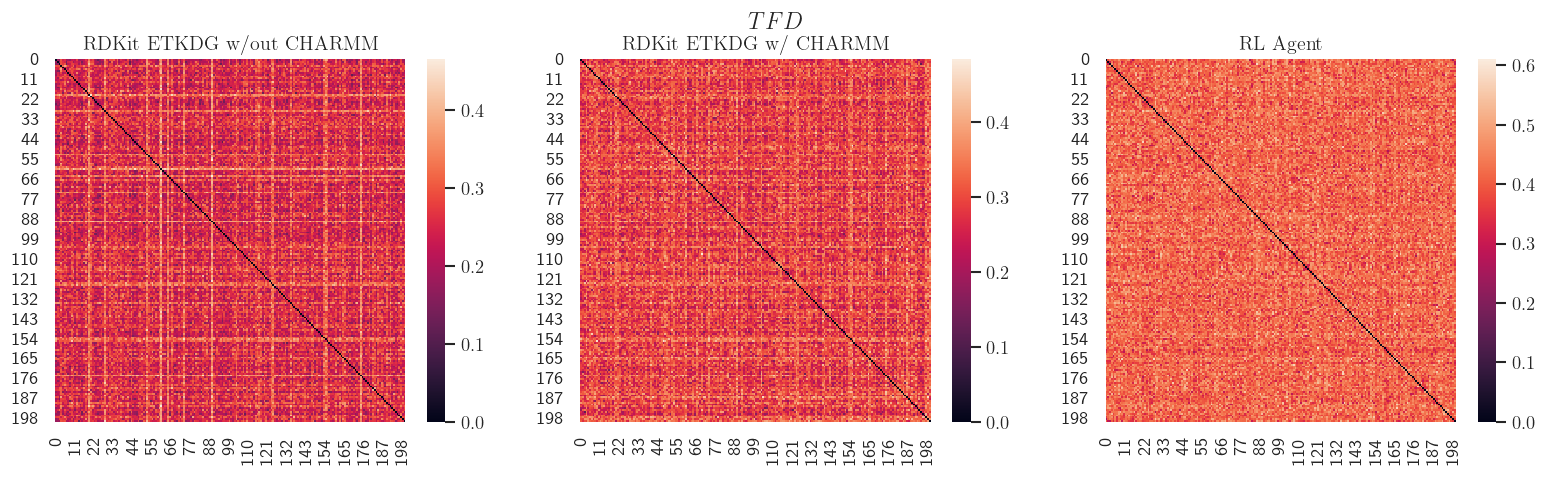

In [81]:
plt.rcParams["axes.grid"] = False
sns.set_style("whitegrid")
plt.rcParams['text.usetex'] = True
plt.rcParams["axes.grid"] = False
blue, = sns.color_palette("muted", 1)

fig, axs = plt.subplots(1, 3, figsize=(16, 4), dpi=120)
sns.heatmap(tfd_vanilla_nonopt, ax=axs[0])
sns.heatmap(tfd_vanilla_opt, ax=axs[1])
sns.heatmap(tfd_rl, ax=axs[2])

fig.suptitle('$TFD$')
axs[0].set_title('$\mathrm{RDKit \\ ETKDG \\ w/out \\ CHARMM}$')
axs[1].set_title('$\mathrm{RDKit \\ ETKDG \\ w/ \\ CHARMM}$')
axs[2].set_title('$\mathrm{RL \\ Agent}$')

In [84]:
import pickle

filename = "/home/yppatel/idp_rl/GYDPETGTWG.pkl"
with open(filename, 'rb') as file:
    config = pickle.load(file)

In [94]:
non_opt_energies = np.array(non_opt_energies)
opt_energies = np.array(opt_energies)
rl_energies = np.array(rl_energies)

KB = 0.001985875 # Boltzmann constant in kcal/(mol * K)

non_opt_gibbs_rewards = np.log(np.exp(-1.0 * (non_opt_energies - config.E0) / (KB * config.tau)) / config.Z0)
opt_gibbs_rewards = np.log(np.exp(-1.0 * (opt_energies - config.E0) / (KB * config.tau)) / config.Z0)
rl_gibbs_rewards = np.log(np.exp(-1.0 * (rl_energies - config.E0) / (KB * config.tau)) / config.Z0)

/tmp/ipykernel_3108363/486400820.py:7: RuntimeWarning: divide by zero encountered in log
  non_opt_gibbs_rewards = np.log(np.exp(-1.0 * (non_opt_energies - config.E0) / (KB * config.tau)) / config.Z0)


non_opt_gibbs=-718.6918826467052
opt_gibbs=-616.261572699201
rl_gibbs=-544.1578689970029


Text(0.5, 1.0, '$\\mathrm{Gibbs \\ Scores}$')

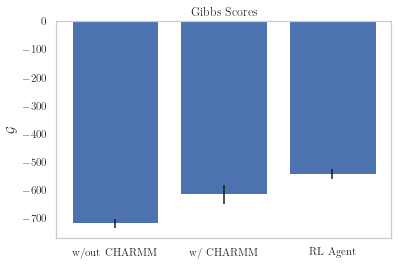

In [119]:
non_opt_gibbs_rewards_mean = np.nanmean(non_opt_gibbs_rewards[np.isfinite(non_opt_gibbs_rewards)])
opt_gibbs_rewards_mean = np.mean(opt_gibbs_rewards)
rl_gibbs_rewards_mean = np.mean(rl_gibbs_rewards)

non_opt_gibbs_rewards_std = np.std(non_opt_gibbs_rewards[np.isfinite(non_opt_gibbs_rewards)])
opt_gibbs_rewards_std = np.std(opt_gibbs_rewards)
rl_gibbs_rewards_std = np.std(rl_gibbs_rewards)

print(f"non_opt_gibbs={non_opt_gibbs_rewards_mean}")
print(f"opt_gibbs={opt_gibbs_rewards_mean}")
print(f"rl_gibbs={rl_gibbs_rewards_mean}")

plt.bar(
    [
        "$\\mathrm{w/out \\ CHARMM}$", 
        "$\\mathrm{w/ \\ CHARMM}$", 
        "$\\mathrm{RL \\ Agent}$"
    ], 
    [non_opt_gibbs_rewards_mean, opt_gibbs_rewards_mean, rl_gibbs_rewards_mean], 
    yerr=[non_opt_gibbs_rewards_std, opt_gibbs_rewards_std, rl_gibbs_rewards_std]    
)

plt.ylabel('$\\mathcal{G}$')
plt.title('$\\mathrm{Gibbs \\ Scores}$')